<a href="https://colab.research.google.com/github/pandi018/Breast-Cancer-Prediction/blob/main/BreastCancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#BreastCancer Prediction 

In [ ]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [ ]:
df=pd.read_csv('data.csv')

In [ ]:
df.head(3) 

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN


In [ ]:
df.shape

(569, 33)

In [ ]:
df.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of         id  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    False      False        False         False           False      False   
1    False      False        False         False           False      False   
2    False      False        False         False           False      False   
3    False      False        False         False           False      False   
4    False      False        False         False           False      False   
..     ...        ...          ...           ...             ...        ...   
564  False      False        False         False           False      False   
565  False      False        False         False           False      False   
566  False      False        False         False           False      False   
567  False      False        False         False           False      False   
568  False      False        False         False           False     

Soo now we can conclude onething that ourdataset doesn't have any null values except unnamed column

In [ ]:
#drop the null value column 
df=df.dropna(axis=1) #dropna to delete the null value axis=1 to delete the entire column  
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
#next one is  diagnosis have datatype as object but ml only accept the numerical values so we have to convert that into numerical value
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
df['diagnosis']=label.fit_transform(df['diagnosis']) 
df['diagnosis']

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


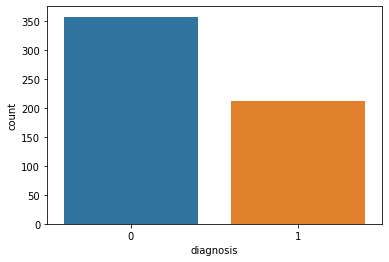

In [ ]:
#now all the catogorical values are converted into numerical 
sns.countplot(df['diagnosis'])

#we can conclude that M is converted into 0 and B is converted into 1

In [ ]:
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

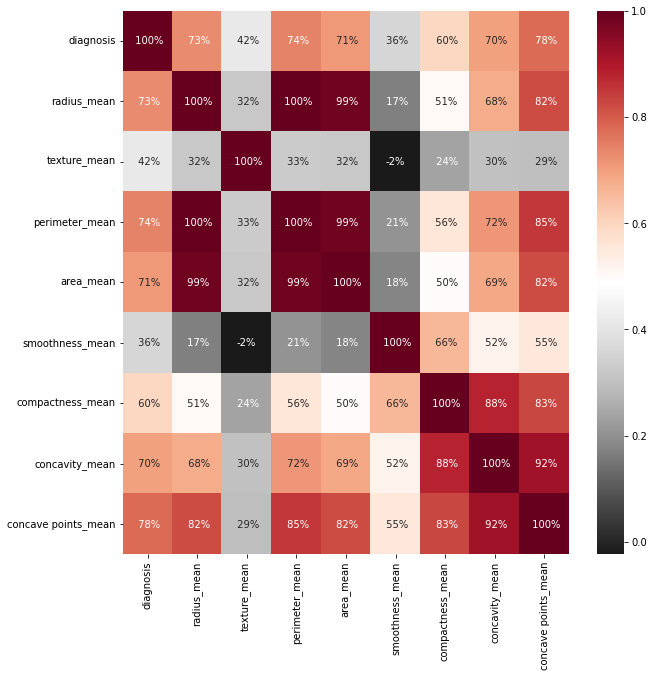

In [ ]:
#correlation of the columns  
plt.figure(figsize=(10,10))
sns.heatmap(df.iloc[:,1:10].corr(),annot=True,cmap='RdGy_r',fmt=' .0%') 
#annot is just to full the values inside the boxes and cmp for coloring and fmt is to mentio what kind of formet we need

In [ ]:
#feature scalling 
x=df.drop(['diagnosis','id'],axis=1) 
print(x.shape) #here we don't want id and diagnosis to predict
y=df['diagnosis'] 
#so here y(diagnosis) is dependent on x

(569, 30)


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=45) 
#now we just split the given data to test and train

In [ ]:
#normalization the data 
from sklearn.preprocessing import MinMaxScaler 
scale=MinMaxScaler()
x_train=scale.fit_transform(x_train)
x_test=scale.fit_transform(x_test) 
x_test

array([[0.18879265, 0.25329726, 0.19307581, ..., 0.53436426, 0.27075812,
        0.44975435],
       [0.48790762, 0.42002029, 0.4879414 , ..., 0.52508591, 0.41710636,
        0.22108084],
       [0.63083913, 0.58674332, 0.61578329, ..., 0.58316151, 0.44043321,
        0.27858419],
       ...,
       [0.27540347, 0.26208996, 0.27130122, ..., 0.28508591, 0.11746737,
        0.17295668],
       [0.15802925, 0.22455191, 0.14871122, ..., 0.08182131, 0.30991391,
        0.21159   ],
       [0.15140328, 0.26445722, 0.14739824, ..., 0.19158076, 0.41377395,
        0.36768647]])

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
model.score(x_test,y_test)

0.9707602339181286

In [ ]:
from sklearn.naive_bayes import GaussianNB 
model1=GaussianNB() 
model1.fit(x_train,y_train) 
model1.predict(x_test) 
model1.score(x_test,y_test)

0.9415204678362573

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model2=DecisionTreeClassifier()
model2.fit(x_train,y_train) 
#model2.score(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
model2.predict(x_test)

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0])

In [ ]:
model2.score(x_test,y_test)

0.8713450292397661

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model3=RandomForestClassifier(n_estimators=10) 

In [ ]:
model3.fit(x_train,y_train) 
#model3.score(x_train,y_train) 

RandomForestClassifier(n_estimators=10)

In [ ]:
model3.predict(x_test)

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0])

In [ ]:
model3.score(x_test,y_test)

0.9239766081871345

In [ ]:
from sklearn.svm import SVC 

#svc_model = SVC(C= .1, kernel='linear', gamma= 1) 
model4= SVC()
model4.fit(x_train,y_train)
model4.predict(x_test)

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0])

In [ ]:
model4.score(x_test,y_test)

0.9766081871345029

#So as of now i just trained five models 
 1.logisticRegression 2.Native Bayes 3.DecisionTreeClassifier 4.RandomForestClassifier 5.SVM and the predicted scores are 
0.9707602339181286,0.9415204678362573,0.9181286549707602,0.9298245614035088
0.9766081871345029

#logisticRegression and SVM gives the prediction score above 95%

In [ ]:
#confusion Matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,model2.predict(x_test)) 
tp=cm[0][0]
tn=cm[0][1]
fn=cm[1][0]
fp=cm[1][1]
print(cm)
print("Accuracy",(tp+tn)/tp+tn+fn+fp)

NameError: ignored

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
print("accuracy for logisticregression",accuracy_score(y_test,model.predict(x_test)))  
print("accuracy for Native Bayes",accuracy_score(y_test,model1.predict(x_test)))  
print("accuracy for DecisionTreeClassifier",accuracy_score(y_test,model2.predict(x_test)))  
print("accuracy for RandomForestClassifier",accuracy_score(y_test,model3.predict(x_test)))  
print("accuracy for SVM",accuracy_score(y_test,model4.predict(x_test)))   

#x_test

accuracy for logisticregression 0.9707602339181286
accuracy for Native Bayes 0.9415204678362573
accuracy for DecisionTreeClassifier 0.8713450292397661
accuracy for RandomForestClassifier 0.9239766081871345
accuracy for SVM 0.9766081871345029


In [ ]:
print("Classification_report")
print("accuracy for logisticregression",classification_report(y_test,model.predict(x_test)))  
print("accuracy for Native Bayes",classification_report(y_test,model1.predict(x_test)))  
print("accuracy for DecisionTreeClassifier",classification_report(y_test,model2.predict(x_test)))  
print("accuracy for RandomForestClassifier",classification_report(y_test,model3.predict(x_test)))  
print("accuracy for SVM",classification_report(y_test,model4.predict(x_test)))

Classification_report
accuracy for logisticregression               precision    recall  f1-score   support

           0       0.97      0.98      0.98       110
           1       0.97      0.95      0.96        61

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171

accuracy for Native Bayes               precision    recall  f1-score   support

           0       0.98      0.93      0.95       110
           1       0.88      0.97      0.92        61

    accuracy                           0.94       171
   macro avg       0.93      0.95      0.94       171
weighted avg       0.95      0.94      0.94       171

accuracy for DecisionTreeClassifier               precision    recall  f1-score   support

           0       0.97      0.83      0.89       110
           1       0.75      0.95      0.84        61

    accuracy                           0.87       171
   macro avg